# Case Study #2:Bitcoin Market Sentiment Dataset
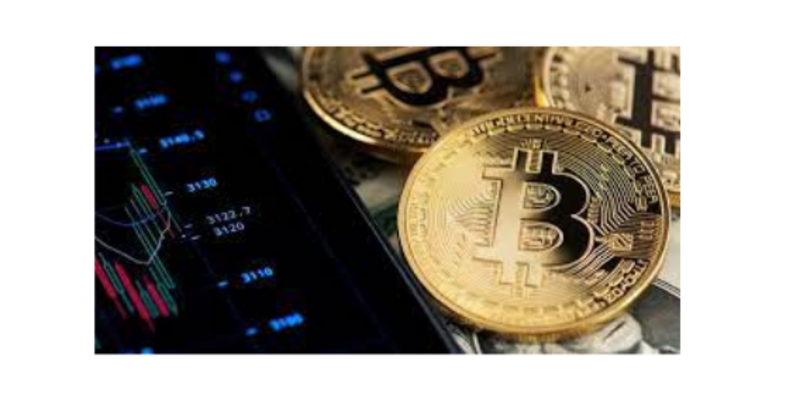

**Project Overview**  
There are two primary datasets:
1. Bitcoin Market Sentiment Dataset
- Columns: Date, Classification (Fear,Greed etc.)  
2. Historical Trader Data from Hyperliquid
- Columns include: account, symbol, execution price, size, side, time, start position, event, closedPnL, leverage, etc.  
our objective is to explore the relationship between trader performance and market sentiment, uncover hidden patterns, and deliver insights that can drive smarter trading strategies.
  
**Link to dataset: [Historical Data](https://drive.google.com/file/d/1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs/view?usp=sharing) & [Sentiment Dataset](https://drive.google.com/file/d/1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf/view)**

In [51]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [52]:
# load file
historical = "https://drive.google.com/uc?export=download&id=1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs"
sentiment = "https://drive.google.com/uc?export=download&id=1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf"

h_df = pd.read_csv(historical)
s_df = pd.read_csv(sentiment)

In [53]:
# Displaying historical dataset
h_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [54]:
# Display sentiment dataset
s_df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [55]:
# datatype of columns
h_df.info(),s_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

(None, None)

- In historical dataset and sentiment dataset there is two time variables.These all datetime varible datatype is not in datetime. first we will change these varibles in datetime format.

In [56]:
# convert Timestam properly
h_df['Timestamp IST'] = pd.to_datetime(h_df['Timestamp IST'],dayfirst=True)
h_df['Timestamp'] = pd.to_datetime(h_df['Timestamp'],unit='ms',utc=True)

# converting sentiment date
s_df['timestamp'] = pd.to_datetime(s_df['timestamp'],unit='s',utc=True)
s_df['date'] = pd.to_datetime(s_df['date'])

In [57]:
# check the duplicate values
h_df.duplicated().sum(),s_df.duplicated().sum()

(np.int64(0), np.int64(0))

## Descriptive Statistics
Here, we will do a descriptive statistical analysis. We use df.describe() and assign 'include = 'all' to ensure that categorical features are also included in the output.

In [58]:
h_df.describe()

,Execution Price,Size Tokens,Size USD,Timestamp IST,Start Position,Closed PnL,Order ID,Fee,Trade ID
count,211224.000000,2.112240e+05,2.112240e+05,211224,2.112240e+05,211224.000000,2.112240e+05,211224.000000,2.112240e+05
mean,11414.723350,4.623365e+03,5.639451e+03,2025-01-31 12:04:22.915009792,-2.994625e+04,48.749001,6.965388e+10,1.163967,5.628549e+14
min,0.000005,8.740000e-07,0.000000e+00,2023-05-01 01:06:00,-1.433463e+07,-117990.104100,1.732711e+08,-1.175712,0.000000e+00
25%,4.854700,2.940000e+00,1.937900e+02,2024-12-31 21:00:45,-3.762311e+02,0.000000,5.983853e+10,0.016121,2.810000e+14
50%,18.280000,3.200000e+01,5.970450e+02,2025-02-24 18:55:00,8.472793e+01,0.000000,7.442939e+10,0.089578,5.620000e+14
75%,101.580000,1.879025e+02,2.058960e+03,2025-04-02 18:22:00,9.337278e+03,5.792797,8.335543e+10,0.393811,8.460000e+14
max,109004.000000,1.582244e+07,3.921431e+06,2025-05-01 12:13:00,3.050948e+07,135329.090100,9.014923e+10,837.471593,1.130000e+15
std,29447.654868,1.042729e+05,3.657514e+04,NaN,6.738074e+05,919.164828,1.835753e+10,6.758854,3.257565e+14


- In closed pnl the 25% and 50% value is showing 0.

In [59]:
s_df.describe(include='all')

,timestamp,value,classification,date
count,2644,2644.000000,2644,2644
unique,NaN,NaN,5,NaN
top,NaN,NaN,Fear,NaN
freq,NaN,NaN,781,NaN
mean,2021-09-17 17:14:45.022693120+00:00,46.981089,NaN,2021-09-17 11:44:45.022692864
min,2018-02-01 05:30:00+00:00,5.000000,NaN,2018-02-01 00:00:00
25%,2019-11-26 23:30:00+00:00,28.000000,NaN,2019-11-26 18:00:00
50%,2021-09-17 17:30:00+00:00,46.000000,NaN,2021-09-17 12:00:00
75%,2023-07-10 11:30:00+00:00,66.000000,NaN,2023-07-10 06:00:00
max,2025-05-02 05:30:00+00:00,95.000000,NaN,2025-05-02 00:00:00


In [60]:
s_df['classification'].value_counts()

classification
Fear             781
Greed            633
Extreme Fear     508
Neutral          396
Extreme Greed    326
Name: count, dtype: int64

- You will see 'NaN' in some of the categorical columns and that's perfectly fine. Categorical values are not meant to have calculations performed on them so, we can ignore those.
- In classification there is 5 unique category.

## Exploratory Data Analysis (EDA)

In [67]:
# Extract only the date part from Timestamp
h_df['trade_date'] = h_df['Timestamp'].dt.date
h_df['trade_date'] = pd.to_datetime(h_df['trade_date'])

In [68]:
# merge
m_df = h_df.merge(s_df[['date','classification']],left_on='trade_date',right_on='date',how='left')
m_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype              
---  ------            --------------   -----              
 0   Account           211224 non-null  object             
 1   Coin              211224 non-null  object             
 2   Execution Price   211224 non-null  float64            
 3   Size Tokens       211224 non-null  float64            
 4   Size USD          211224 non-null  float64            
 5   Side              211224 non-null  object             
 6   Timestamp IST     211224 non-null  datetime64[ns]     
 7   Start Position    211224 non-null  float64            
 8   Direction         211224 non-null  object             
 9   Closed PnL        211224 non-null  float64            
 10  Transaction Hash  211224 non-null  object             
 11  Order ID          211224 non-null  int64              
 12  Crossed           211224 non-null  bool     

In [72]:
# counting classification category
m_df['classification'].value_counts()

classification
Fear             133871
Greed             36289
Neutral            7141
Extreme Greed      6962
Name: count, dtype: int64

In [73]:
s_df['classification'].value_counts()

classification
Fear             781
Greed            633
Extreme Fear     508
Neutral          396
Extreme Greed    326
Name: count, dtype: int64

- In merge dataset **Extreme Fear** category is missing.
- But in sentiment the value of Extreme Fear is 508.

In [82]:
# In sentiment dataset filter for Extreme fear and group by month year
extreme_fear_monthly = (s_df[s_df['classification']=='Extreme Fear']
                       .groupby(s_df['date'].dt.to_period('M')).size()
                       .reset_index(name='count'))
extreme_fear_monthly

,date,count
0,2018-02,4
1,2018-03,5
2,2018-04,14
3,2018-05,4
4,2018-06,16
5,2018-08,23
6,2018-09,17
7,2018-10,12
8,2018-11,13
9,2018-12,22


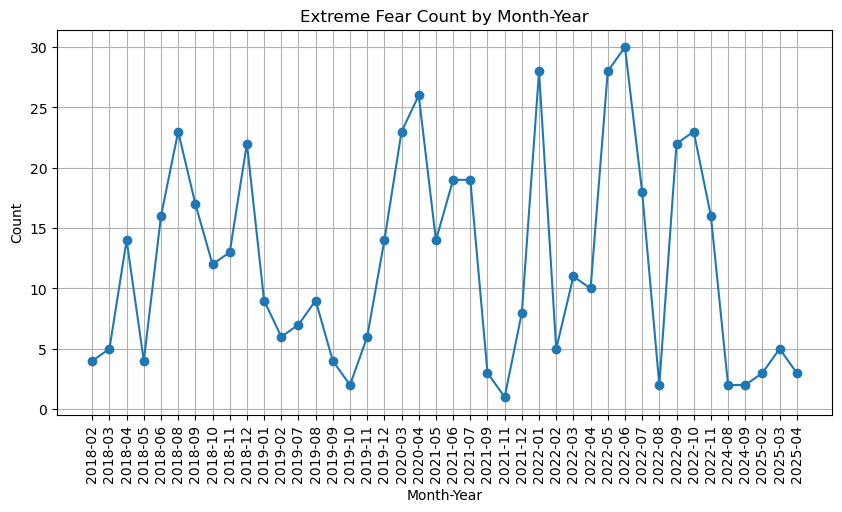

In [87]:
# Convert period to string for plotting
extreme_fear_monthly['date'] = extreme_fear_monthly['date'].astype(str)
plt.figure(figsize=(10,5))
plt.plot(extreme_fear_monthly['date'], extreme_fear_monthly['count'], marker='o')
plt.title("Extreme Fear Count by Month-Year")
plt.xlabel("Month-Year")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [111]:
# filter fear and group by month year
fear_monthly = (s_df[s_df['classification']=='Fear']
                .groupby(s_df['date'].dt.to_period('M'))
               .size().reset_index(name='count'))

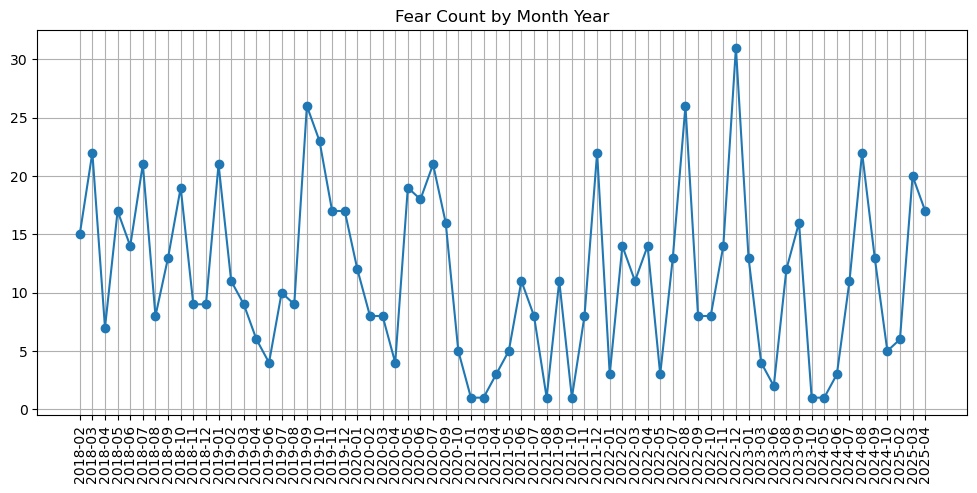

In [110]:
fear_monthly['date'] = fear_monthly['date'].astype(str)
plt.figure(figsize=(12,5))
plt.plot(fear_monthly['date'],fear_monthly['count'],marker='o')
plt.title("Fear Count by Month Year")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [113]:
# Filter greed by month year
greed_monthly = (s_df[s_df['classification']=='Greed']
                .groupby(s_df['date'].dt.to_period('M'))
                .size().reset_index(name='count'))

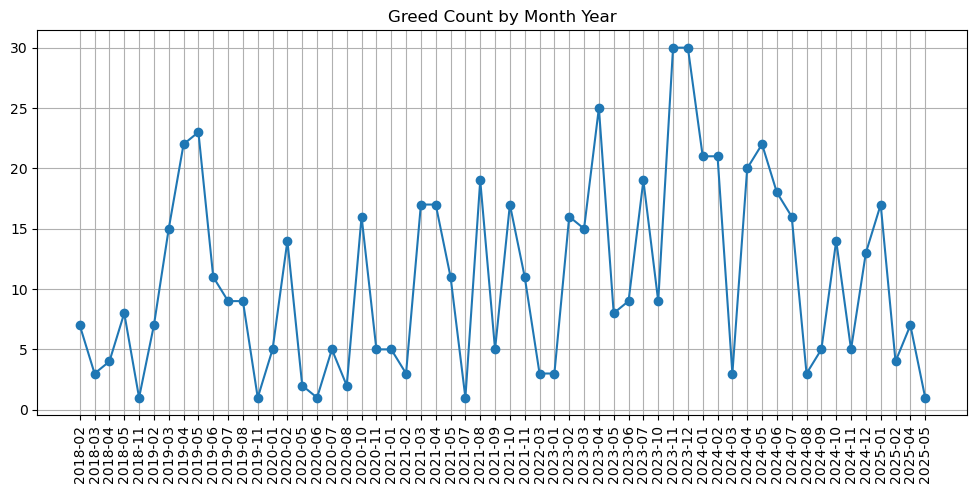

In [120]:
greed_monthly['date'] = greed_monthly['date'].astype(str)
plt.figure(figsize=(12,5))
plt.plot(greed_monthly['date'],greed_monthly['count'],marker='o')
plt.title("Greed Count by Month Year")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [115]:
# filter extreme greed by month year
extreme_greed_month = (s_df[s_df['classification']=='Extreme Greed']
                      .groupby(s_df['date'].dt.to_period('M')).size().reset_index(name='count'))
extreme_greed_month

,date,count
0,2019-05,6
1,2019-06,14
2,2019-07,4
3,2020-07,3
4,2020-08,29
5,2020-09,3
6,2020-10,2
7,2020-11,25
8,2020-12,31
9,2021-01,25


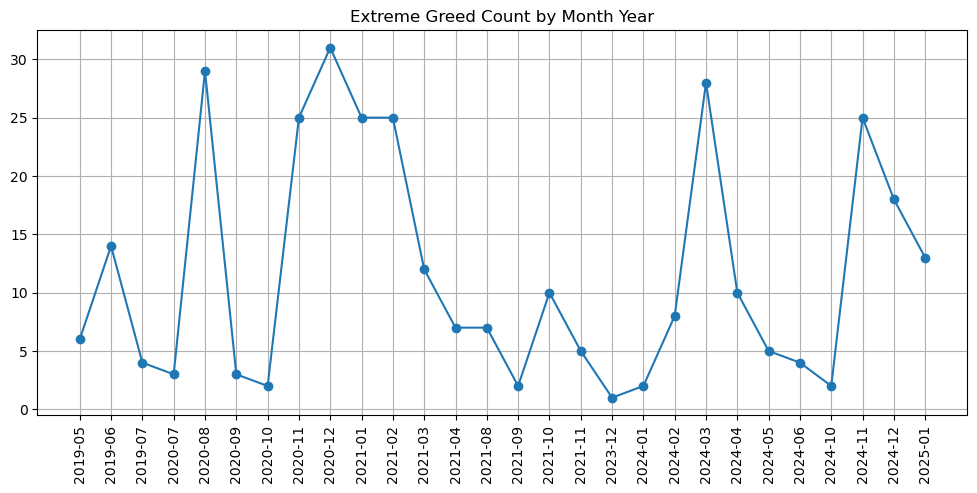

In [121]:
extreme_greed_month['date'] = extreme_greed_month['date'].astype(str)
plt.figure(figsize=(12,5))
plt.plot(extreme_greed_month['date'],extreme_greed_month['count'],marker='o')
plt.title("Extreme Greed Count by Month Year")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [116]:
# Filter by Neutarl and grouping by month year
neutral_month = (s_df[s_df['classification']=='Neutral']
                .groupby(s_df['date'].dt.to_period('M')).size().reset_index(name='count'))
neutral_month

,date,count
0,2018-02,2
1,2018-03,1
2,2018-04,2
3,2018-05,2
4,2018-07,10
5,2018-11,7
6,2019-01,1
7,2019-02,4
8,2019-03,7
9,2019-04,2


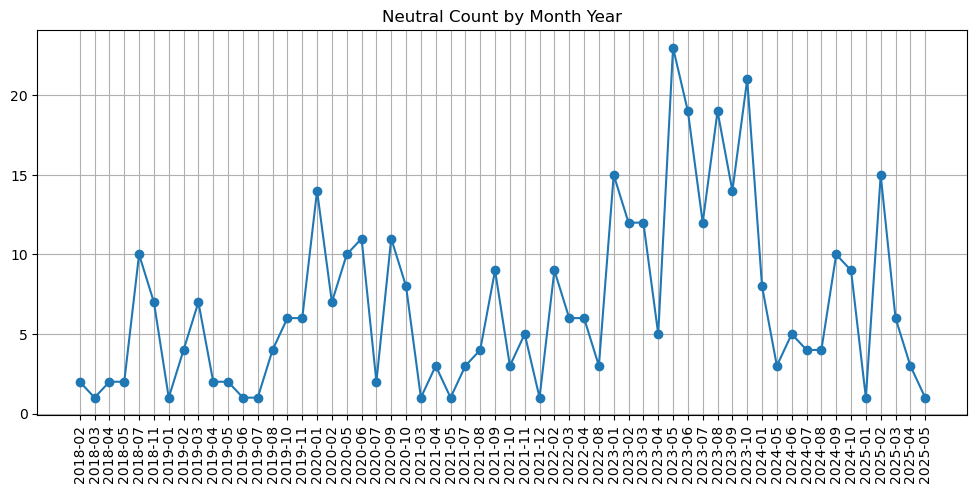

In [122]:
neutral_month['date'] = neutral_month['date'].astype(str)
plt.figure(figsize=(12,5))
plt.plot(neutral_month['date'],neutral_month['count'],marker='o')
plt.title("Neutral Count by Month Year")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [124]:
# displaying from Historical data closed pnl by month year
h_df['month_year'] = h_df['trade_date'].dt.to_period('M')

# Group by month_year and calculate sum of Closed PnL
closed_pnl_mon = (h_df.groupby('month_year')['Closed PnL'].sum().reset_index())
closed_pnl_mon['month_year'] = closed_pnl_mon['month_year'].astype(str)

In [125]:
closed_pnl_mon

,month_year,Closed PnL
0,2023-03,0.000000e+00
1,2023-11,1.555034e+02
2,2024-03,1.769655e+05
3,2024-07,1.587424e+05
4,2024-10,3.189461e+06
5,2025-02,6.699925e+06
6,2025-06,7.170935e+04


- The sentiment dataset covers the period from 01-Feb-2018 to 02-May-2025.
- The historical trader dataset covers the period from 28-Mar-2023 to 15-Jun-2025.
- Extreme Fear sentiment after March 2023 appears only 11 times:
>Feb-2025 → 3 days
Mar-2025 → 5 days
Apr-2025 → 3 days
- No trades occurred on the exact same dates as Extreme Fear sentiment days.
- So when we merge by date, there are zero matching records for Extreme Fear.

## Relationship Between Trader Performance and Market Sentiment

In [136]:
m_df.isnull().sum()

Account                 0
Coin                    0
Execution Price         0
Size Tokens             0
Size USD                0
Side                    0
Timestamp IST           0
Start Position          0
Direction               0
Closed PnL              0
Transaction Hash        0
Order ID                0
Crossed                 0
Fee                     0
Trade ID                0
Timestamp               0
trade_date              0
date                26961
classification      26961
dtype: int64

In [138]:
m_df = m_df.dropna()

In [141]:
m_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 184263 entries, 0 to 210767
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype              
---  ------            --------------   -----              
 0   Account           184263 non-null  object             
 1   Coin              184263 non-null  object             
 2   Execution Price   184263 non-null  float64            
 3   Size Tokens       184263 non-null  float64            
 4   Size USD          184263 non-null  float64            
 5   Side              184263 non-null  object             
 6   Timestamp IST     184263 non-null  datetime64[ns]     
 7   Start Position    184263 non-null  float64            
 8   Direction         184263 non-null  object             
 9   Closed PnL        184263 non-null  float64            
 10  Transaction Hash  184263 non-null  object             
 11  Order ID          184263 non-null  int64              
 12  Crossed           184263 non-null  bool          

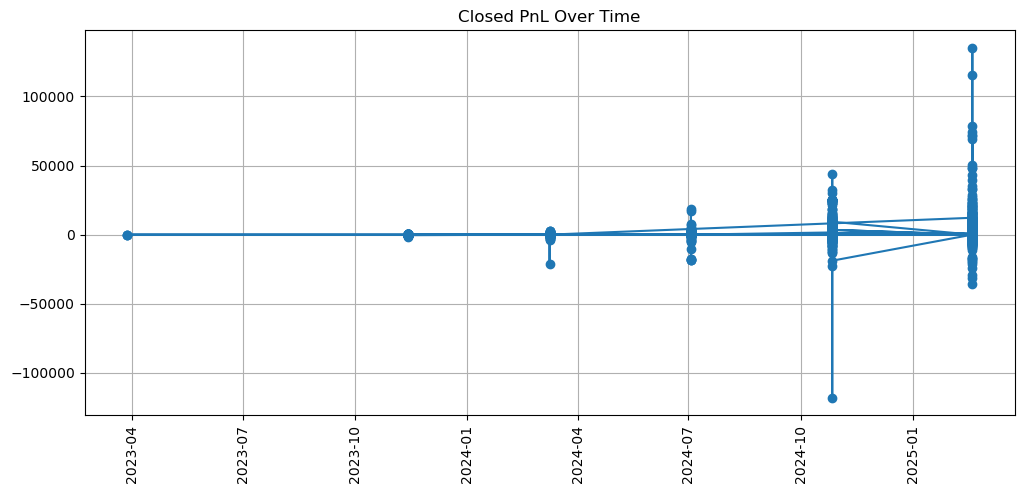

In [156]:
# plt closed pnl by trade date
plt.figure(figsize=(12,5))
plt.plot(m_df['trade_date'],m_df['Closed PnL'],marker='o')
plt.title("Closed PnL Over Time")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [150]:
# Group by sentiment classification
result = m_df.groupby('classification').agg({
    'Closed PnL' : 'sum',
    'Size USD' : 'sum',
    'Size Tokens':'sum',
    'Fee':'sum',
    'Trade ID':'count'
})
# add calculated column
result['PnL Efficiency'] = result['Closed PnL']/result['Size USD']
result['Token/USD Ratio'] = result['Size Tokens']/result['Size USD']

result = result.sort_values('Closed PnL', ascending=False)
result

,Closed PnL,Size USD,Size Tokens,Fee,Trade ID,PnL Efficiency,Token/USD Ratio
classification,,,,,,,
Fear,6.699925e+06,7.041585e+08,4.111879e+08,145018.043618,133871,0.009515,0.583942
Greed,3.189617e+06,1.155037e+08,8.100132e+07,24334.033389,36289,0.027615,0.701288
Extreme Greed,1.769655e+05,3.940677e+07,3.393031e+08,6812.781233,6962,0.004491,8.610275
Neutral,1.587424e+05,2.184323e+07,1.404851e+07,8743.877486,7141,0.007267,0.643152


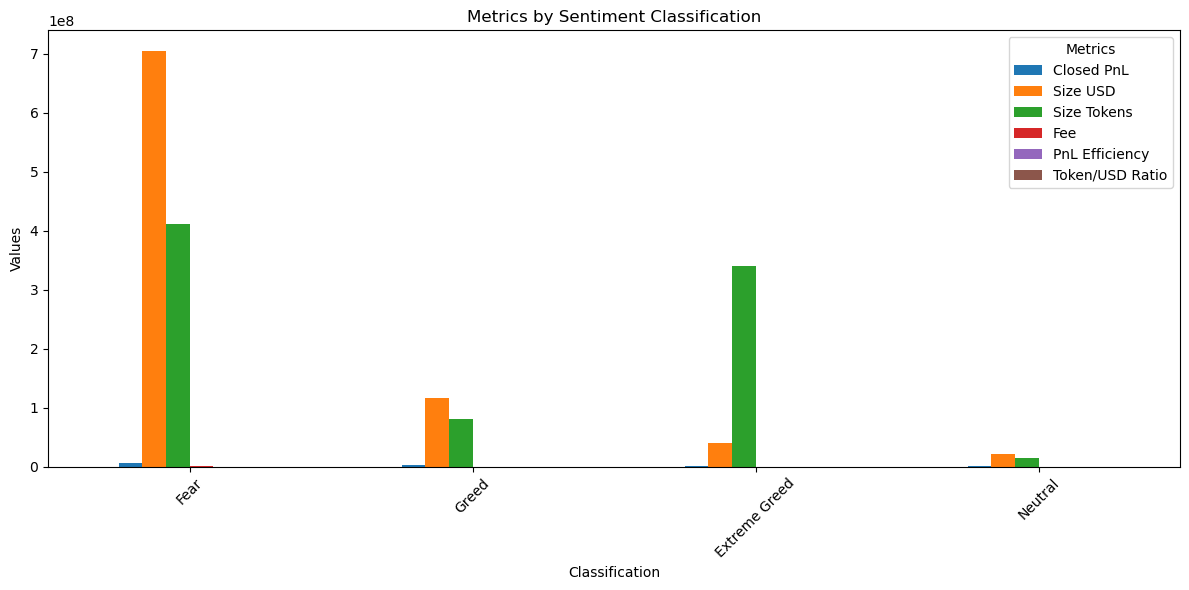

In [157]:
# Select only numeric columns for plotting
metrics = ['Closed PnL', 'Size USD', 'Size Tokens', 'Fee', 'PnL Efficiency', 'Token/USD Ratio']

# Create a bar chart
result[metrics].plot(kind='bar', figsize=(12,6))
plt.title("Metrics by Sentiment Classification")
plt.xlabel("Classification")
plt.ylabel("Values")
plt.xticks(rotation=45)
plt.legend(title="Metrics")
plt.tight_layout()
plt.show()

## Insights
**Fear sentiment**
- Highest Closed PnL ➡️ Makes the most total profit because it has the most trades and highest capital usage.
- Low PnL Efficiency ➡️ Profit per dollar is small ➡️ They made money, but needed a lot of capital.

**Greed sentiment**

- Best PnL Efficiency ➡️ Highest profit per dollar ➡️ More efficient trading with less capital compared to Fear.
- Moderate Closed PnL because trades and capital are lower than Fear.

**Extreme Greed sentiment**

- Low Closed PnL & low efficiency ➡️ Few trades, not much profit, not efficient.

**Neutral sentiment**

- Lowest Closed PnL ➡️ Very few trades and moderate efficiency.

## Conclusion

- Best Overall Performer (Efficiency): Greed ➡️ Most profitable per dollar traded.
- Highest Total Profit: Fear ➡️ Makes the most money but only because it has the highest number of trades and largest capital exposure.

## Statistical Test by ANOVA (Analysis of Variance)

In [158]:
from scipy.stats import f_oneway

In [159]:
# extract closed pnl values from each sentiment category
fear = m_df[m_df['classification']=='Fear']['Closed PnL']
greed = m_df[m_df['classification']=='Greed']['Closed PnL']
ext_greed = m_df[m_df['classification']=='Extreme Greed']['Closed PnL']
neutral = m_df[m_df['classification']=='Neutral']['Closed PnL']

In [160]:
# One way anova
f_stat,p_value=f_oneway(fear,greed,ext_greed,neutral)
print("f statistic:",f_stat)
print("p value:",p_value)

if p_value<0.05:
    print("Significant difference between at least one pair of categories")
else:
    print("No significant difference between categories")

f statistic: 21.33042041351866
p value: 8.287959255248323e-14
Significant difference between at least one pair of categories


In [161]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [162]:
# Tukey’s HSD Post-hoc test
anova_data = m_df[['Closed PnL', 'classification']]
tukey = pairwise_tukeyhsd(endog=anova_data['Closed PnL'],
                          groups=anova_data['classification'],
                          alpha=0.05)
print(tukey)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
    group1     group2 meandiff p-adj   lower    upper   reject
--------------------------------------------------------------
Extreme Greed    Fear  24.6288 0.1415  -4.9838  54.2415  False
Extreme Greed   Greed  62.4761    0.0  30.9567  93.9955   True
Extreme Greed Neutral  -3.1891 0.9971 -43.7627  37.3846  False
         Fear   Greed  37.8472    0.0  23.5901  52.1044   True
         Fear Neutral -27.8179 0.0693 -57.0756   1.4398  False
        Greed Neutral -65.6651    0.0 -96.8514 -34.4789   True
--------------------------------------------------------------


C:\Users\ravir\AppData\Local\Temp\ipykernel_11008\612052664.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='classification', y='Closed PnL', data=m_df, palette='Set2')


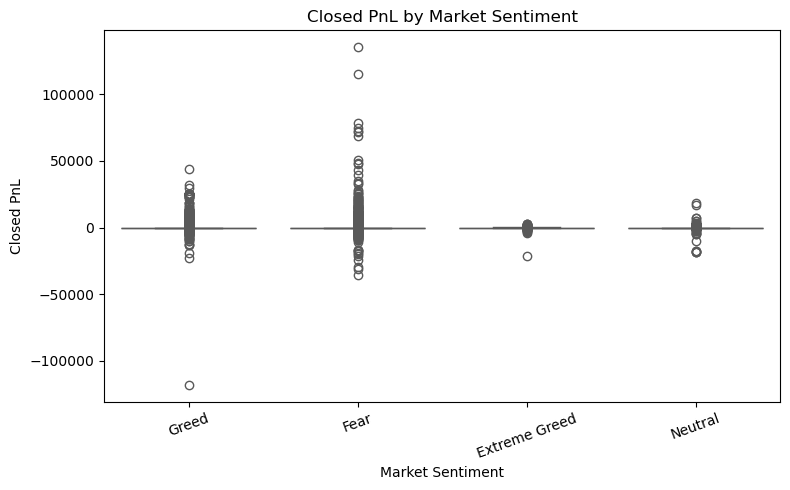

In [164]:
# Visualization: Boxplot of Closed PnL by sentiment
plt.figure(figsize=(8, 5))
sns.boxplot(x='classification', y='Closed PnL', data=m_df, palette='Set2')
plt.title('Closed PnL by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Closed PnL')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

### Hidden Patterns & Insights
**1. Greed Sentiment**
- Tukey’s test shows Greed has significantly different Closed PnL compared to Extreme Greed, Fear, and Neutral.
- The trader performance changes the most when the market moves into or out of Greed phases.

**2. Fear sentiment shows big spikes**   
- The boxplot shows high positive values under Fear. Some traders achieve exceptionally high profits when others are fearful.
- This suggests a buy when others are fearful strategy might work in certain conditions.

**3.Extreme Greed = stable but lower returns**
- Very small variation in Closed PnL during Extreme Greed: Lower risk, lower reward environment.

**4. Neutral sentiment = average performance**
- No significant difference vs Fear or Extreme Greed ➡️ Performance is steady but not exceptional.

### Trading Strategies
- Monitor sentiment shifts: Major PnL changes happen when sentiment enters or exits Greed.
- Opportunistic trading in Fear: Consider aggressive positions when Fear sentiment dominates, as potential gains can be high.
- Risk management in Extreme Greed: Expect lower volatility, so strategy focus could be on steady returns rather than big wins.
- Sentiment-based position sizing: Allocate larger positions in Fear, smaller in Extreme Greed, moderate in Neutral.